# IMPORTS


In [213]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pylab as plt
from mplsoccer import VerticalPitch
import matplotlib.font_manager as font_manager
pd.set_option('display.max_columns', 200)

# DATA SCRAPING


#### CHANGE PLAYER ID FROM UNDERSTAT


In [214]:
playerID = '7841'

In [215]:
URL = f"https://understat.com/player/{playerID}"

In [216]:
response = requests.get(URL)
soup = BeautifulSoup(response.content, 'lxml')
scripts = soup.find_all('script')

In [217]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var groupsData 		= JSON.parse('\x7B\x22season\x22\x3A\x5B\x7B\x22position\x22\x3A\x22FWL\x22,\x22games\x22\x3A\x225\x22,\x22goals\x22\x3A\x221\x22,\x22shots\x22\x3A\x225\x22,\x22time\x22\x3A\x22326\x22,\x22xG\x22\x3A\x220.8149142637848854\x22,\x22assists\x22\x3A\x221\x22,\x22xA\x22\x3A\x220.35327896289527416\x22,\x22key_passes\x22\x3A\x225\x22,\x22season\x22\x3A\x222024\x22,\x22team\x22\x3A\x22Mallorca\x22,\x22yellow\x22\x3A\x220\x22,\x22red\x22\x3A\x220\x22,\x22npg\x22\x3A\x221\x22,\x22npxG\x22\x3A\x220.8149142637848854\x22,\x22xGChain\x22\x3A\x220.9764397852122784\x22,\x22xGBuildup\x22\x3A\x220.16152550652623177\x22\x7D,\x7B\x22position\x22\x3A\x22MC\x22,\x22games\x22\x3A\x2236\x22,\x22goals\x22\x3A\x222\x22,\x22shots\x22\x3A\x2227\x22,\x22time\x22\x3A\x222672\x22,\x22xG\x22\x3A\x221.548793044872582\x22,\x22assists\x22\x3A\x224\x22

In [218]:
#Retrieve Shots Data
shotsDataString = scripts[3].string

In [219]:
shotsDataString

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22310954\\x22,\\x22minute\\x22\\x3A\\x223\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.865999984741211\\x22,\\x22Y\\x22\\x3A\\x220.455\\x22,\\x22xG\\x22\\x3A\\x220.37256601452827454\\x22,\\x22player\\x22\\x3A\\x22Dani\\x20Rodr\\x5Cu00edguez\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x227841\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222019\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2212025\\x22,\\x22h_team\\x22\\x3A\\x22Mallorca\\x22,\\x22a_team\\x22\\x3A\\x22Eibar\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222019\\x2D08\\x2D17\\x2019\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Aleix\\x20Febas\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22310962\\x22,\\x22minute\\x22\\x3A\\x2236\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x

In [220]:
#Clean data and json conversion
indexStart = shotsDataString.index("('")+2
indexEnd = shotsDataString.index("')")
jsonData = shotsDataString[indexStart:indexEnd]
jsonData = jsonData.encode('utf8').decode('unicode_escape')

data = json.loads(jsonData)

In [221]:
data

[{'id': '310954',
  'minute': '3',
  'result': 'Goal',
  'X': '0.865999984741211',
  'Y': '0.455',
  'xG': '0.37256601452827454',
  'player': 'Dani Rodríguez',
  'h_a': 'h',
  'player_id': '7841',
  'situation': 'OpenPlay',
  'season': '2019',
  'shotType': 'RightFoot',
  'match_id': '12025',
  'h_team': 'Mallorca',
  'a_team': 'Eibar',
  'h_goals': '2',
  'a_goals': '1',
  'date': '2019-08-17 19:00:00',
  'player_assisted': 'Aleix Febas',
  'lastAction': 'Pass'},
 {'id': '310962',
  'minute': '36',
  'result': 'BlockedShot',
  'X': '0.7659999847412109',
  'Y': '0.435',
  'xG': '0.015295400284230709',
  'player': 'Dani Rodríguez',
  'h_a': 'h',
  'player_id': '7841',
  'situation': 'FromCorner',
  'season': '2019',
  'shotType': 'RightFoot',
  'match_id': '12025',
  'h_team': 'Mallorca',
  'a_team': 'Eibar',
  'h_goals': '2',
  'a_goals': '1',
  'date': '2019-08-17 19:00:00',
  'player_assisted': None,
  'lastAction': 'Aerial'},
 {'id': '310975',
  'minute': '70',
  'result': 'MissedSh

In [222]:
df = pd.json_normalize(data)

In [223]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,310954,3,Goal,0.865999984741211,0.455,0.37256601452827454,Dani Rodríguez,h,7841,OpenPlay,2019,RightFoot,12025,Mallorca,Eibar,2,1,2019-08-17 19:00:00,Aleix Febas,Pass
1,310962,36,BlockedShot,0.7659999847412109,0.435,0.015295400284230709,Dani Rodríguez,h,7841,FromCorner,2019,RightFoot,12025,Mallorca,Eibar,2,1,2019-08-17 19:00:00,None,Aerial
2,310975,70,MissedShots,0.9069999694824219,0.49900001525878906,0.30651000142097473,Dani Rodríguez,h,7841,OpenPlay,2019,Head,12025,Mallorca,Eibar,2,1,2019-08-17 19:00:00,Lago Junior,Cross
3,310978,81,MissedShots,0.8159999847412109,0.4779999923706055,0.042501501739025116,Dani Rodríguez,h,7841,FromCorner,2019,RightFoot,12025,Mallorca,Eibar,2,1,2019-08-17 19:00:00,None,None
4,313063,21,SavedShot,0.8019999694824219,0.5479999923706055,0.04787150025367737,Dani Rodríguez,h,7841,OpenPlay,2019,LeftFoot,12040,Mallorca,Real Sociedad,0,1,2019-08-25 16:00:00,Lago Junior,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,585512,4,MissedShots,0.855999984741211,0.39099998474121095,0.06866459548473358,Dani Rodríguez,h,7841,OpenPlay,2024,LeftFoot,26989,Mallorca,Real Madrid,1,1,2024-08-18 19:30:00,Johan Mojica,HeadPass
146,585518,36,MissedShots,0.9009999847412109,0.590999984741211,0.052321311086416245,Dani Rodríguez,h,7841,OpenPlay,2024,Head,26989,Mallorca,Real Madrid,1,1,2024-08-18 19:30:00,Pablo Maffeo,Cross
147,586254,25,BlockedShot,0.88,0.4379999923706055,0.06267165392637253,Dani Rodríguez,a,7841,OpenPlay,2024,LeftFoot,26994,Osasuna,Mallorca,1,0,2024-08-24 15:00:00,Johan Mojica,Cross
148,589694,23,MissedShots,0.76,0.7290000152587891,0.011470855213701725,Dani Rodríguez,a,7841,OpenPlay,2024,RightFoot,27016,Leganes,Mallorca,0,1,2024-08-31 19:30:00,None,None


In [224]:
df.shape

(150, 20)

# DATA CLEANUP + VARIABLE ASSIGNMENT


In [225]:
playerName = df['player'].iloc[0]
season = df['season'].iloc[0]

In [226]:
playerName

'Dani Rodríguez'

In [227]:
df['result'].unique()

array(['Goal', 'BlockedShot', 'MissedShots', 'SavedShot', 'ShotOnPost'],
      dtype=object)

In [228]:
df.drop(columns=['player', 'h_a', 'player_id', 'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team', 'a_goals', 'player_assisted', 'lastAction'], inplace=True)

In [229]:
df['date'] = pd.to_datetime(df['date'])

In [230]:
df['xG'] = df['xG'].astype(float)
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

In [231]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [232]:
df

,id,minute,result,X,Y,xG,h_goals,date
0,310954,3,Goal,86.599998,45.500000,0.372566,2,2019-08-17 19:00:00
1,310962,36,BlockedShot,76.599998,43.500000,0.015295,2,2019-08-17 19:00:00
2,310975,70,MissedShots,90.699997,49.900002,0.306510,2,2019-08-17 19:00:00
3,310978,81,MissedShots,81.599998,47.799999,0.042502,2,2019-08-17 19:00:00
4,313063,21,SavedShot,80.199997,54.799999,0.047872,0,2019-08-25 16:00:00
...,...,...,...,...,...,...,...,...
145,585512,4,MissedShots,85.599998,39.099998,0.068665,1,2024-08-18 19:30:00
146,585518,36,MissedShots,90.099998,59.099998,0.052321,1,2024-08-18 19:30:00
147,586254,25,BlockedShot,88.000000,43.799999,0.062672,1,2024-08-24 15:00:00
148,589694,23,MissedShots,76.000000,72.900002,0.011471,0,2024-08-31 19:30:00


In [233]:
totalShots = df.shape[0]
totalGoals = df[df['result'] == 'Goal'].shape[0]

In [234]:
totalXG = df['xG'].sum()
XGPerShot = totalXG/totalShots

#### ASSUMING THE FIELD IS 110 M


In [235]:
averageDistance = df['X'].mean()
xDistanceMeter = 110 - (averageDistance*1.10)

In [236]:
averageDistance

83.23399998982747

# GRAPHING


In [237]:
backgroundColor = '#1a1c1f'
fontPath = './Roboto-Regular.ttf'
fontProps = font_manager.FontProperties(fname = fontPath)

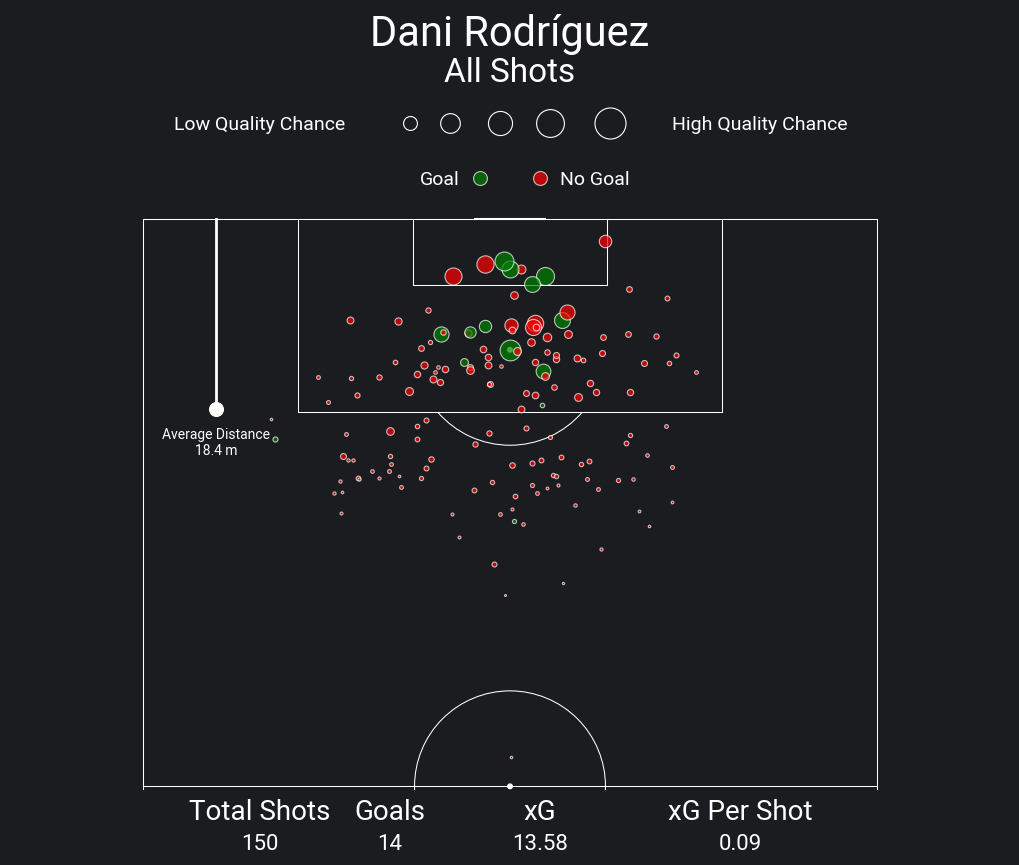

In [238]:
fig = plt.figure(figsize = (10,12))
fig.patch.set_facecolor(backgroundColor)

#CREATE 1ST BLOCK
ax1 = fig.add_axes([0, 0.7, 1, 0.2])
ax1.set_facecolor(backgroundColor)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#HEADERS
ax1.text(x=0.5, y=0.85, s=playerName, fontsize=30, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.text(x=0.5, y=0.70, s='All Shots', fontsize=24, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#QUALITY
ax1.text(x=0.25, y=0.50, s='Low Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.scatter(x=0.40, y=0.53, s=100, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.44, y=0.53, s=200, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.49, y=0.53, s=300, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.54, y=0.53, s=400, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.60, y=0.53, s=500, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.text(x=0.75, y=0.50, s='High Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#GOAL COLOR CODING
ax1.text(x=0.45, y=0.27, s='Goal', fontsize=14, fontproperties=fontProps, color='white', ha='right')
ax1.scatter(x=0.47, y=0.3, s=100, color='green', edgecolor='white', linewidth=0.8, alpha=0.7)
ax1.text(x=0.55, y=0.27, s='No Goal', fontsize=14, fontproperties=fontProps, color='white', ha='left')
ax1.scatter(x=0.53, y=0.3, s=100, color='red', edgecolor='white', linewidth=0.8, alpha=0.7)

#CREATE 2ND BLOCK
ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])
ax2.set_facecolor(backgroundColor)

#CREATE PITCH
pitch = VerticalPitch(pitch_type='opta', half=True, pitch_color=backgroundColor, pad_bottom=0.5, line_color='white', linewidth=0.75, axis=True, label=True)
pitch.draw(ax=ax2)

#Average Distance PLot
ax2.scatter(x=90, y=averageDistance, s=100, color='white', linewidth=0.8)
ax2.plot([90,90], [100,averageDistance], color='white', linewidth=2)
ax2.text(x=90, y=averageDistance-4, s=f'Average Distance\n{xDistanceMeter:.1f} m', fontsize=10, fontproperties=fontProps, color='white', ha='center')

for x in df.to_dict(orient='records'):
    pitch.scatter(x['X'], x['Y'], s=300 * x['xG'], color='green' if x['result'] == 'Goal' else 'red', ax=ax2, alpha=0.7, linewidth=0.8, edgecolor='white')

#CREATE 3RD BLOCK
ax3 = fig.add_axes([0, 0.2, 1, 0.05])
ax3.set_facecolor(backgroundColor)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)

ax3.text(x=0.25, y=0.5, s='Total Shots', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.25, y=0, s=f'{totalShots}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.38, y=0.5, s='Goals', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.38, y=0, s=f'{totalGoals}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.53, y=0.5, s='xG', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.53, y=0, s=f'{totalXG:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.73, y=0.5, s='xG Per Shot', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.73, y=0, s=f'{XGPerShot:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# FILTER BY SEASON


In [239]:
month = 6
year = 2023

In [240]:
startDate = f"{year}-{month:02d}-01"
endDate = f"{year+1}-{month:02d}-01"

In [241]:
filteredDF = df[(df['date'] >= startDate) & (df['date'] < endDate)]

In [242]:
totalShots = filteredDF.shape[0]
totalGoals = filteredDF[filteredDF['result'] == 'Goal'].shape[0]
totalXG = filteredDF['xG'].sum()
XGPerShot = totalXG/totalShots
averageDistance = filteredDF['X'].mean()
xDistanceMeter = 110 - (averageDistance*1.10)

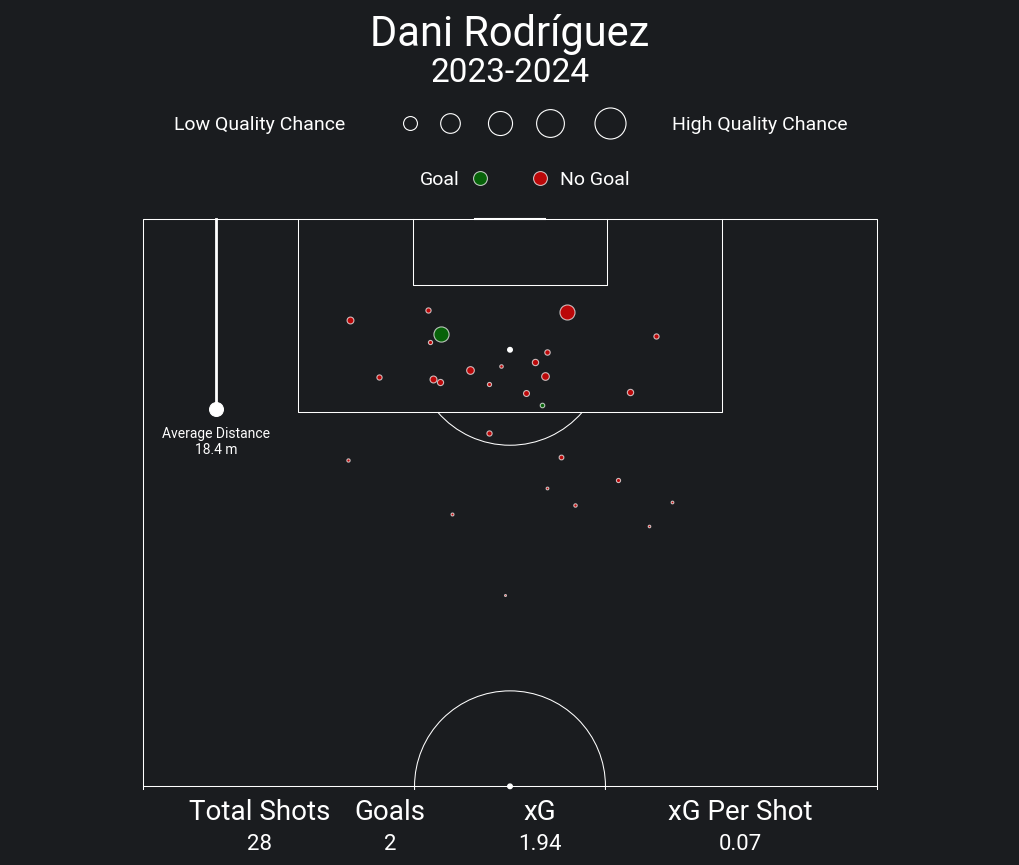

In [243]:
fig = plt.figure(figsize = (10,12))
fig.patch.set_facecolor(backgroundColor)

#CREATE 1ST BLOCK
ax1 = fig.add_axes([0, 0.7, 1, 0.2])
ax1.set_facecolor(backgroundColor)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#HEADERS
ax1.text(x=0.5, y=0.85, s=playerName, fontsize=30, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.text(x=0.5, y=0.70, s=f'{year}-{year+1}', fontsize=24, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#QUALITY
ax1.text(x=0.25, y=0.50, s='Low Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.scatter(x=0.40, y=0.53, s=100, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.44, y=0.53, s=200, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.49, y=0.53, s=300, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.54, y=0.53, s=400, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.60, y=0.53, s=500, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.text(x=0.75, y=0.50, s='High Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#GOAL COLOR CODING
ax1.text(x=0.45, y=0.27, s='Goal', fontsize=14, fontproperties=fontProps, color='white', ha='right')
ax1.scatter(x=0.47, y=0.3, s=100, color='green', edgecolor='white', linewidth=0.8, alpha=0.7)
ax1.text(x=0.55, y=0.27, s='No Goal', fontsize=14, fontproperties=fontProps, color='white', ha='left')
ax1.scatter(x=0.53, y=0.3, s=100, color='red', edgecolor='white', linewidth=0.8, alpha=0.7)

#CREATE 2ND BLOCK
ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])
ax2.set_facecolor(backgroundColor)

#CREATE PITCH
pitch = VerticalPitch(pitch_type='opta', half=True, pitch_color=backgroundColor, pad_bottom=0.5, line_color='white', linewidth=0.75, axis=True, label=True)
pitch.draw(ax=ax2)

#Average Distance PLot
ax2.scatter(x=90, y=averageDistance, s=100, color='white', linewidth=0.8)
ax2.plot([90,90], [100,averageDistance], color='white', linewidth=2)
ax2.text(x=90, y=averageDistance-4, s=f'Average Distance\n{xDistanceMeter:.1f} m', fontsize=10, fontproperties=fontProps, color='white', ha='center')

for x in filteredDF.to_dict(orient='records'):
    pitch.scatter(x['X'], x['Y'], s=300 * x['xG'], color='green' if x['result'] == 'Goal' else 'red', ax=ax2, alpha=0.7, linewidth=0.8, edgecolor='white')

#CREATE 3RD BLOCK
ax3 = fig.add_axes([0, 0.2, 1, 0.05])
ax3.set_facecolor(backgroundColor)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)

ax3.text(x=0.25, y=0.5, s='Total Shots', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.25, y=0, s=f'{totalShots}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.38, y=0.5, s='Goals', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.38, y=0, s=f'{totalGoals}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.53, y=0.5, s='xG', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.53, y=0, s=f'{totalXG:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.73, y=0.5, s='xG Per Shot', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.73, y=0, s=f'{XGPerShot:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()